In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Simple Genetic Algorithm for the 0-1 Knapsack problem
Genetic algorithm (GA) finds a solution to a problem using a stochastic selection of subsets and evolution process. The crossover process produces new generations, the mutation  replaces a part of variable with a random element and further evaluation finds a current best
subset. 

In [2]:
# Maximum weight for the knapsack
MAX_WEIGHT = 1500

In [6]:
df = pd.read_csv('knapsack.csv')
df.head(7)
df

,Item_id,item_weights,item_values
0,1,21,96
1,2,12,99
2,3,30,52
3,4,24,100
4,5,45,46
...,...,...,...
95,96,47,93
96,97,28,6
97,98,24,53
98,99,25,12


In [7]:
# initialise the random selection of items (either 1 or 0 )
def initialise_pops():
    config = [random.randint(0, 1) for _ in range(100)]
    return config

In [8]:
# objective function: find better combination with the higher value between two
def compare_fitness(one, two):
    score_one = score_fitness(one)
    score_two = score_fitness(two)
    return one if score_one > score_two else two

In [9]:
# fitness evaluation
def score_fitness(config:list):
    weight_sum = 0
    values_sum = 0
    i = 0
   
    while weight_sum < MAX_WEIGHT and i < 100:
        if config[i] == 1:
            weight_sum += df.iloc[i].item_weights
            values_sum += df.iloc[i].item_values
        i += 1
    
    return values_sum
    

In [10]:
# crossover operation
def crossover(a:list, b:list):
    cpoint = int(len(a)/2)
    p1 = a[:]
    p2 = b[:]
    crossed1 = p1[:cpoint] + p2[cpoint:]
    crossed2 = p1[cpoint:] + p2[:cpoint]
    return crossed1, crossed2
 

In [11]:
# mutation opeation
def mutate(a):
    mutated = a[:]
    i = random.randint(0, len(mutated) - 1)
    mutated[i] = 0
    return mutated

In [12]:
# main function to generate solutions
def genetic_algorithm_kanpsack(init_pop = 16, mutation=True):
    pops =[initialise_pops() for p in range(init_pop)]
    
    best_score = 0
    best_pop = []
    for i in range(init_pop - 3):
        #first gen
        first_gen_one = compare_fitness(pops[i], pops[i+1])
        first_gen_two = compare_fitness(pops[i+2], pops[i+3])
        
        second_one, second_two = crossover(first_gen_one, first_gen_two)
        
        current_best = compare_fitness(second_one, second_two)
        current_best_score = score_fitness(current_best)
        if mutation:
            current_best = mutate(current_best)
            current_best_score = score_fitness(current_best)
        
        if current_best_score > best_score:
            best_score = current_best_score
            best_pops = current_best
            
    return best_score
        

In [21]:
# display solutions and plot
def display_knapsack_values(iters=30):

    results= []
    for i in range(iters):
        results.append(genetic_algorithm_kanpsack())

    plot_data = pd.DataFrame({'knapsack values': results, 
                              'iterations': np.arange(1,iters+1,1, dtype=int)},
                            index=range(iters))

    print(plot_data)
    mean_val = np.mean(plot_data['knapsack values'])
    median_val = np.median(plot_data['knapsack values'])
    print('**********************************')
    print(f'Average Value:{round(mean_val, 2)}')
    print(f'Median Value:{median_val}')

    #styling
    plt.style.use('fivethirtyeight')
    plt.title('Knapsack Values', fontsize=17)
    plt.xlabel('Iterations', fontsize = 14)
    plt.ylabel('Values', fontsize = 14)

    plt.xlim([0,32])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    

    #display
    plt.plot( plot_data['iterations'], 
             plot_data['knapsack values'], 
             color='#cc66ff', 
             linewidth=3)
    plt.show()


    knapsack values  iterations
0              3169           1
1              3195           2
2              3122           3
3              3222           4
4              3215           5
5              3175           6
6              3106           7
7              3018           8
8              3106           9
9              3218          10
10             3202          11
11             3273          12
12             2984          13
13             3253          14
14             3137          15
15             3375          16
16             3114          17
17             3224          18
18             3182          19
19             3052          20
20             3179          21
21             3154          22
22             3167          23
23             3269          24
24             3148          25
25             3051          26
26             2969          27
27             3151          28
28             3016          29
29             3129          30
********

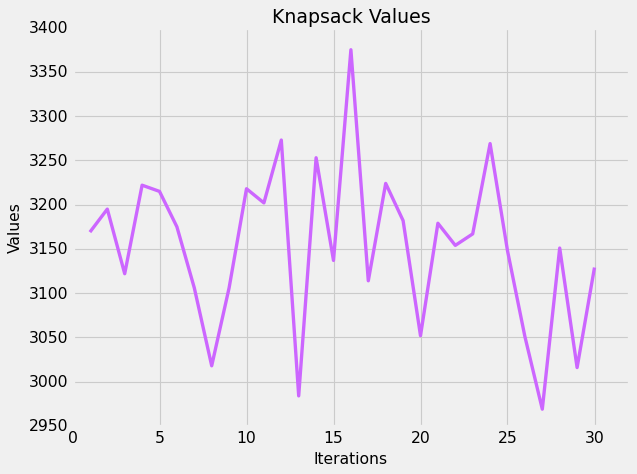

In [22]:
display_knapsack_values(iters=30)